In [1]:
from model import Net
from utils import get_dst_device, print_model_summary
device = get_dst_device()
model = Net().to(device)
print_model_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
       BatchNorm2d-2           [-1, 32, 26, 26]              64
              ReLU-3           [-1, 32, 26, 26]               0
         AvgPool2d-4           [-1, 32, 13, 13]               0
           Dropout-5           [-1, 32, 13, 13]               0
            Conv2d-6           [-1, 32, 11, 11]           9,248
       BatchNorm2d-7           [-1, 32, 11, 11]              64
              ReLU-8           [-1, 32, 11, 11]               0
         MaxPool2d-9             [-1, 32, 6, 6]               0
          Dropout-10             [-1, 32, 6, 6]               0
           Conv2d-11             [-1, 16, 4, 4]           4,624
      BatchNorm2d-12             [-1, 16, 4, 4]              32
             ReLU-13             [-1, 16, 4, 4]               0
          Dropout-14             [-1, 1

Batch Size torch.Size([128, 1, 28, 28])


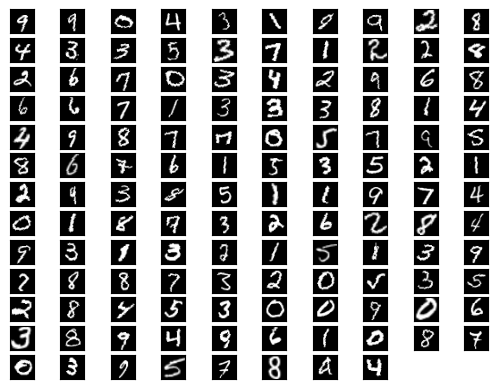

In [2]:
from utils import setup_test_loader, setup_train_loader, plot_data
train_loader = setup_train_loader("../data")
test_loader = setup_test_loader("../data")
plot_data(train_loader)

In [3]:
import torch.optim as optim
import torch.nn.functional as F
from utils import train_model, test_model
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20
train_loss_per_epoch = []
test_loss_per_epoch = []
train_accuracy_per_epoch = []
test_accuracy_per_epoch = []
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  [train_accuracy, train_loss] = train_model(model, device, train_loader, optimizer, criterion)
  train_accuracy_per_epoch.append(train_accuracy)
  train_loss_per_epoch.append(train_loss)

  [test_accuracy, test_loss] = test_model(model, device, test_loader, criterion)
  test_accuracy_per_epoch.append(train_accuracy)
  test_loss_per_epoch.append(train_loss)

  scheduler.step()

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 1


Train: Loss=0.1050 Batch_id=468 Accuracy=89.53: 100%|██████████| 469/469 [00:27<00:00, 17.20it/s]

[93.5336822556137, 95.77276772471077, 87.59650889560255, 87.58766922198663, 91.68093118794933, 85.92510606899097, 91.68638053396417, 90.24740622505986, 83.95146128866861, 86.14893259371324]


Test set: Average loss: 0.0542, Accuracy: 9819/10000 (98.19%)

[98.87755102040816, 99.29515418502203, 98.06201550387597, 98.91089108910892, 95.21384928716904, 98.4304932735426, 99.06054279749478, 97.85992217898833, 98.56262833675564, 97.52229930624381]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 2


Train: Loss=0.0544 Batch_id=468 Accuracy=96.64: 100%|██████████| 469/469 [00:27<00:00, 17.29it/s]

[98.31166638527773, 98.20528033224562, 96.15642833165492, 95.8734301092807, 96.59363231769942, 96.66113263235565, 97.73572152754309, 96.48842777334397, 95.43667749102718, 94.72180198352665]


Test set: Average loss: 0.0335, Accuracy: 9889/10000 (98.89%)

[99.59183673469387, 99.38325991189427, 99.03100775193798, 99.20792079207921, 97.86150712830958, 98.76681614349776, 98.74739039665971, 98.73540856031128, 98.870636550308, 98.61248761149653]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 3


Train: Loss=0.1721 Batch_id=468 Accuracy=97.27: 100%|██████████| 469/469 [00:27<00:00, 17.11it/s]

[98.64933310822218, 98.50192821121328, 97.01242027526015, 96.78682107323439, 97.15850736049299, 97.1407489393101, 98.31023994592768, 97.20670391061452, 95.69304392411554, 96.01613716591024]


Test set: Average loss: 0.0318, Accuracy: 9882/10000 (98.82%)

[99.38775510204081, 98.94273127753304, 99.2248062015504, 99.00990099009901, 99.4908350305499, 98.31838565022422, 98.8517745302714, 98.83268482490273, 98.66529774127311, 97.42319127849356]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 4


Train: Loss=0.0938 Batch_id=468 Accuracy=97.63: 100%|██████████| 469/469 [00:27<00:00, 17.10it/s]

[98.98699983116663, 98.67991693859389, 97.39845585767036, 97.60234871962159, 97.44950359465936, 97.10385537723667, 98.31023994592768, 97.57382282521947, 96.46214322338061, 96.57085224407463]


Test set: Average loss: 0.0295, Accuracy: 9906/10000 (99.06%)

[98.9795918367347, 100.0, 99.03100775193798, 99.4059405940594, 99.4908350305499, 98.87892376681614, 99.26931106471815, 98.92996108949417, 98.15195071868584, 98.31516352824579]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 5


Train: Loss=0.1073 Batch_id=468 Accuracy=97.82: 100%|██████████| 469/469 [00:27<00:00, 17.22it/s]

[98.9532331588722, 98.63541975674875, 97.43202416918429, 97.68390148426032, 97.68914755220814, 97.5465781221177, 98.71578235890503, 97.70151636073425, 96.872329516322, 96.8229954614221]


Test set: Average loss: 0.0282, Accuracy: 9905/10000 (99.05%)

[99.48979591836735, 99.73568281938327, 99.32170542635659, 99.3069306930693, 99.38900203665987, 97.86995515695067, 99.06054279749478, 99.5136186770428, 98.35728952772074, 98.21605550049554]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 6


Train: Loss=0.0742 Batch_id=468 Accuracy=97.95: 100%|██████████| 469/469 [00:27<00:00, 17.26it/s]

[99.15583319263887, 98.93206763571641, 97.75092312856664, 97.65128037840482, 97.41526874358097, 97.74949271352149, 98.74957755998648, 97.829209896249, 97.1628781404888, 96.92385274836107]


Test set: Average loss: 0.0237, Accuracy: 9916/10000 (99.16%)

[99.48979591836735, 99.82378854625551, 99.03100775193798, 99.5049504950495, 98.98167006109979, 98.87892376681614, 99.16492693110646, 98.73540856031128, 98.56262833675564, 99.30624380574827]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 7


Train: Loss=0.0517 Batch_id=468 Accuracy=97.93: 100%|██████████| 469/469 [00:27<00:00, 17.22it/s]

[99.07141651190275, 98.97656481756155, 97.54951325948305, 97.68390148426032, 97.67203012666896, 97.71259915144807, 98.58060155457925, 97.90901835594573, 96.9406938984789, 97.07513867876955]


Test set: Average loss: 0.0240, Accuracy: 9924/10000 (99.24%)

[99.48979591836735, 99.91189427312776, 99.4186046511628, 99.5049504950495, 98.37067209775967, 98.99103139013454, 98.8517745302714, 99.31906614785993, 99.28131416837782, 99.10802775024777]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 8


Train: Loss=0.0657 Batch_id=468 Accuracy=98.14: 100%|██████████| 469/469 [00:27<00:00, 17.31it/s]

[99.12206652034442, 98.93206763571641, 98.12017455521988, 97.97749143695972, 98.03149606299213, 97.93396052388859, 98.64819195674214, 98.14844373503591, 97.17996923602803, 97.1423768700622]


Test set: Average loss: 0.0257, Accuracy: 9921/10000 (99.21%)

[99.38775510204081, 99.82378854625551, 99.51550387596899, 99.60396039603961, 99.08350305498982, 98.09417040358744, 99.16492693110646, 98.0544747081712, 99.48665297741273, 99.70267591674926]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 9


Train: Loss=0.0257 Batch_id=468 Accuracy=98.28: 100%|██████████| 469/469 [00:27<00:00, 17.20it/s]

[99.17271652878608, 99.110056363097, 98.08660624370594, 98.43418691893655, 97.84320438206093, 97.970854085962, 98.93545116593444, 97.90901835594573, 97.79524867544009, 97.36090099176332]


Test set: Average loss: 0.0205, Accuracy: 9936/10000 (99.36%)

[99.59183673469387, 99.73568281938327, 99.4186046511628, 99.10891089108911, 99.69450101832994, 99.32735426008968, 98.8517745302714, 99.61089494163424, 99.28131416837782, 98.90981169474728]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 10


Train: Loss=0.0890 Batch_id=468 Accuracy=98.37: 100%|██████████| 469/469 [00:27<00:00, 17.25it/s]

[99.34154989025832, 98.96173242361317, 98.27123195703255, 98.38525526015331, 98.06573091407053, 98.33978970669618, 98.81716796214938, 98.33998403830806, 97.43633566911639, 97.61304420911078]


Test set: Average loss: 0.0237, Accuracy: 9919/10000 (99.19%)

[99.38775510204081, 99.82378854625551, 99.12790697674419, 99.4059405940594, 99.38900203665987, 98.31838565022422, 99.16492693110646, 99.41634241245137, 98.66529774127311, 99.00891972249752]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 11


Train: Loss=0.0904 Batch_id=468 Accuracy=98.32: 100%|██████████| 469/469 [00:27<00:00, 17.23it/s]

[99.29089988181666, 99.1990507267873, 98.35515273581738, 98.3037024955146, 98.04861348853132, 97.93396052388859, 98.74957755998648, 98.0367118914605, 97.62433772004786, 97.49537737434864]


Test set: Average loss: 0.0220, Accuracy: 9931/10000 (99.31%)

[99.6938775510204, 100.0, 98.74031007751938, 99.10891089108911, 99.18533604887983, 99.43946188340807, 99.26931106471815, 99.61089494163424, 98.97330595482546, 99.00891972249752]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 12


Train: Loss=0.0484 Batch_id=468 Accuracy=98.40: 100%|██████████| 469/469 [00:27<00:00, 17.22it/s]

[99.24024987337498, 99.15455354494216, 98.43907351460221, 98.32001304844235, 98.15131804176652, 98.28444936358606, 98.88475836431226, 98.37190742218675, 97.53888224235173, 97.5121869221718]


Test set: Average loss: 0.0235, Accuracy: 9923/10000 (99.23%)

[99.79591836734694, 99.91189427312776, 98.93410852713178, 99.00990099009901, 99.59266802443992, 98.65470852017937, 99.16492693110646, 99.61089494163424, 98.56262833675564, 98.90981169474728]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 13


Train: Loss=0.0113 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:27<00:00, 17.11it/s]

[99.4090832348472, 99.110056363097, 98.45585767035918, 98.23846028380362, 98.4080794248545, 98.13687511529238, 98.90165596485299, 98.32402234636871, 97.81233977097932, 97.8315683308119]


Test set: Average loss: 0.0237, Accuracy: 9924/10000 (99.24%)

[99.48979591836735, 99.91189427312776, 99.8062015503876, 99.70297029702971, 99.38900203665987, 98.20627802690582, 98.95615866388309, 98.92996108949417, 98.66529774127311, 99.10802775024777]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 14


Train: Loss=0.0462 Batch_id=468 Accuracy=98.44: 100%|██████████| 469/469 [00:26<00:00, 17.46it/s]

[99.22336653722775, 99.09522396914862, 98.37193689157435, 98.1569075191649, 98.4080794248545, 98.24755580151263, 99.01993916863805, 98.38786911412609, 97.77815757990086, 97.56261556564128]


Test set: Average loss: 0.0217, Accuracy: 9939/10000 (99.39%)

[99.6938775510204, 100.0, 99.12790697674419, 99.70297029702971, 99.08350305498982, 98.54260089686099, 99.26931106471815, 99.70817120622569, 99.17864476386036, 99.40535183349851]
Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 15


Train: Loss=0.0674 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:27<00:00, 17.20it/s]

[99.30778321796387, 99.21388312073569, 98.38872104733132, 98.35263415429783, 98.23690516946252, 98.1553218963291, 98.90165596485299, 98.53152434158021, 97.88070415313621, 97.88199697428139]


Test set: Average loss: 0.0192, Accuracy: 9939/10000 (99.39%)

[99.89795918367346, 99.82378854625551, 99.8062015503876, 99.4059405940594, 99.38900203665987, 99.2152466367713, 99.16492693110646, 99.0272373540856, 99.17864476386036, 98.90981169474728]
Adjusting learning rate of group 0 to 2.0000e-03.
Epoch 16


Train: Loss=0.0059 Batch_id=468 Accuracy=98.71: 100%|██████████| 469/469 [00:26<00:00, 17.39it/s]

[99.49349991558331, 99.22871551468407, 98.89224572004028, 98.61360300114174, 98.5107839780897, 98.61649142224682, 99.08752957080095, 98.49960095770152, 98.13707058622457, 97.96604471339721]


Test set: Average loss: 0.0174, Accuracy: 9946/10000 (99.46%)

[99.6938775510204, 99.91189427312776, 99.6124031007752, 99.5049504950495, 99.38900203665987, 98.99103139013454, 99.26931106471815, 99.61089494163424, 99.28131416837782, 99.20713577799802]
Adjusting learning rate of group 0 to 2.0000e-03.
Epoch 17


Train: Loss=0.0090 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:27<00:00, 17.27it/s]

[99.6285666047611, 99.34737466627114, 98.95938234306814, 98.7114663187082, 98.56213625470728, 98.63493820328353, 99.17201757350456, 98.69114126097365, 98.34216373269527, 98.13414019162884]


Test set: Average loss: 0.0169, Accuracy: 9950/10000 (99.50%)

[99.6938775510204, 99.91189427312776, 99.70930232558139, 99.60396039603961, 99.4908350305499, 99.2152466367713, 99.26931106471815, 99.5136186770428, 99.28131416837782, 99.20713577799802]
Adjusting learning rate of group 0 to 2.0000e-03.
Epoch 18


Train: Loss=0.0286 Batch_id=468 Accuracy=98.79: 100%|██████████| 469/469 [00:27<00:00, 17.23it/s]

[99.51038325173054, 99.13972115099378, 98.60691507217187, 98.51573968357528, 98.92160219103047, 98.70872532743037, 99.0537343697195, 98.75498802873105, 98.41052811485216, 98.21818793074466]


Test set: Average loss: 0.0177, Accuracy: 9946/10000 (99.46%)

[99.6938775510204, 99.91189427312776, 99.70930232558139, 99.60396039603961, 99.28716904276986, 98.76681614349776, 99.26931106471815, 99.41634241245137, 99.28131416837782, 99.50445986124876]
Adjusting learning rate of group 0 to 2.0000e-03.
Epoch 19


Train: Loss=0.0257 Batch_id=468 Accuracy=98.76: 100%|██████████| 469/469 [00:27<00:00, 17.21it/s]

[99.35843322640554, 99.39187184811628, 98.74118831822759, 98.61360300114174, 98.52790140362889, 98.59804464121011, 99.12132477188239, 98.7390263367917, 98.08579729960691, 98.28542612203732]


Test set: Average loss: 0.0168, Accuracy: 9954/10000 (99.54%)

[99.6938775510204, 100.0, 99.70930232558139, 99.60396039603961, 99.4908350305499, 99.2152466367713, 99.26931106471815, 99.5136186770428, 99.38398357289527, 99.40535183349851]
Adjusting learning rate of group 0 to 2.0000e-03.
Epoch 20


Train: Loss=0.0142 Batch_id=468 Accuracy=98.82: 100%|██████████| 469/469 [00:27<00:00, 17.06it/s]

[99.44284990714165, 99.3770394541679, 98.79154078549848, 98.72777687163595, 98.61348853132489, 98.5795978601734, 99.2734031767489, 98.77094972067039, 98.32507263715604, 98.21818793074466]


Test set: Average loss: 0.0169, Accuracy: 9952/10000 (99.52%)

[99.6938775510204, 100.0, 99.70930232558139, 99.60396039603961, 99.38900203665987, 99.10313901345292, 99.16492693110646, 99.61089494163424, 99.38398357289527, 99.40535183349851]
Adjusting learning rate of group 0 to 2.0000e-03.


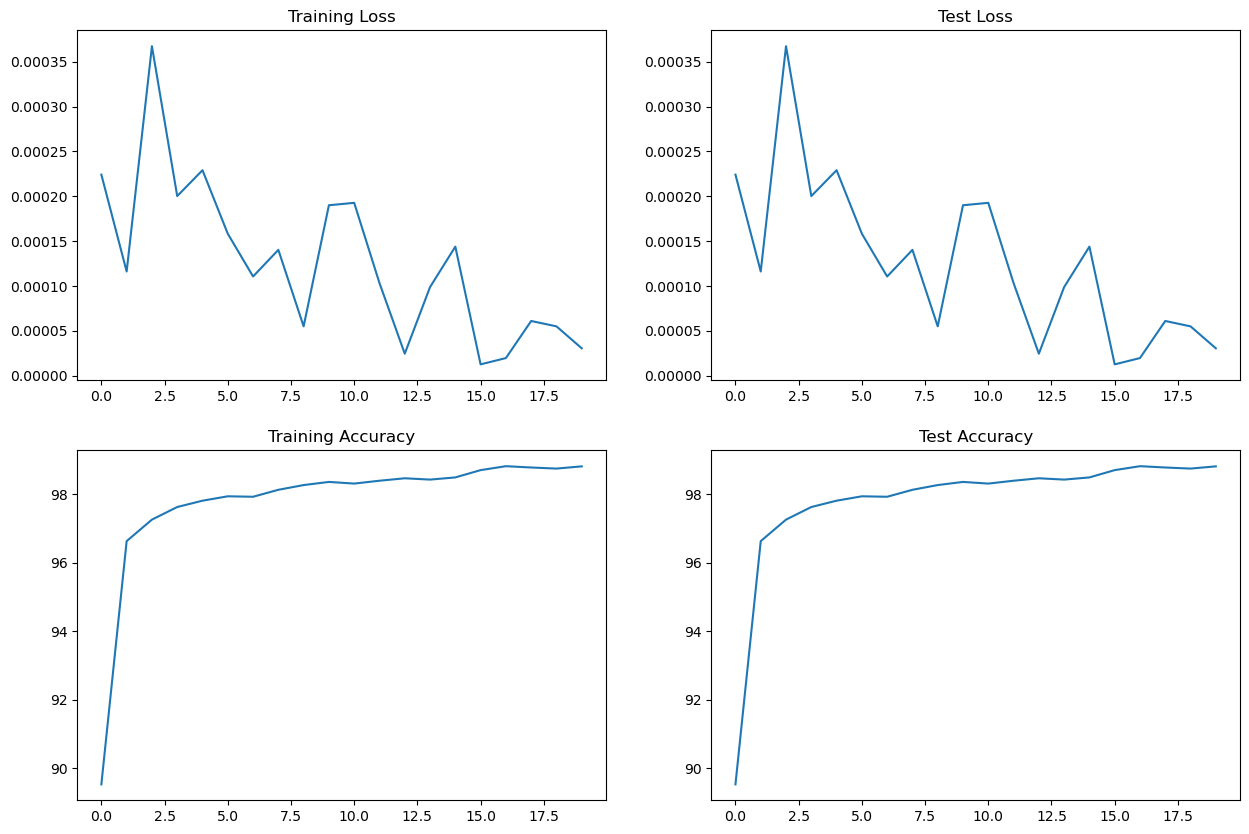

In [4]:
from utils import plot_results
plot_results(train_accuracy_per_epoch, train_loss_per_epoch, test_accuracy_per_epoch, test_loss_per_epoch)